In [1]:
from object_detection_model import ObjectDetectionModel
from inpaint import Inpainting
from quick_draw_dataset import QuickDrawDataset
from util import resize
from util import load_image_into_numpy_array

import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [2]:
object_detection = ObjectDetectionModel()
inpainting = Inpainting()
qd_dataset = QuickDrawDataset()

Evaluate Folder Of Images

Evaluating :  IMG_2531.jpeg


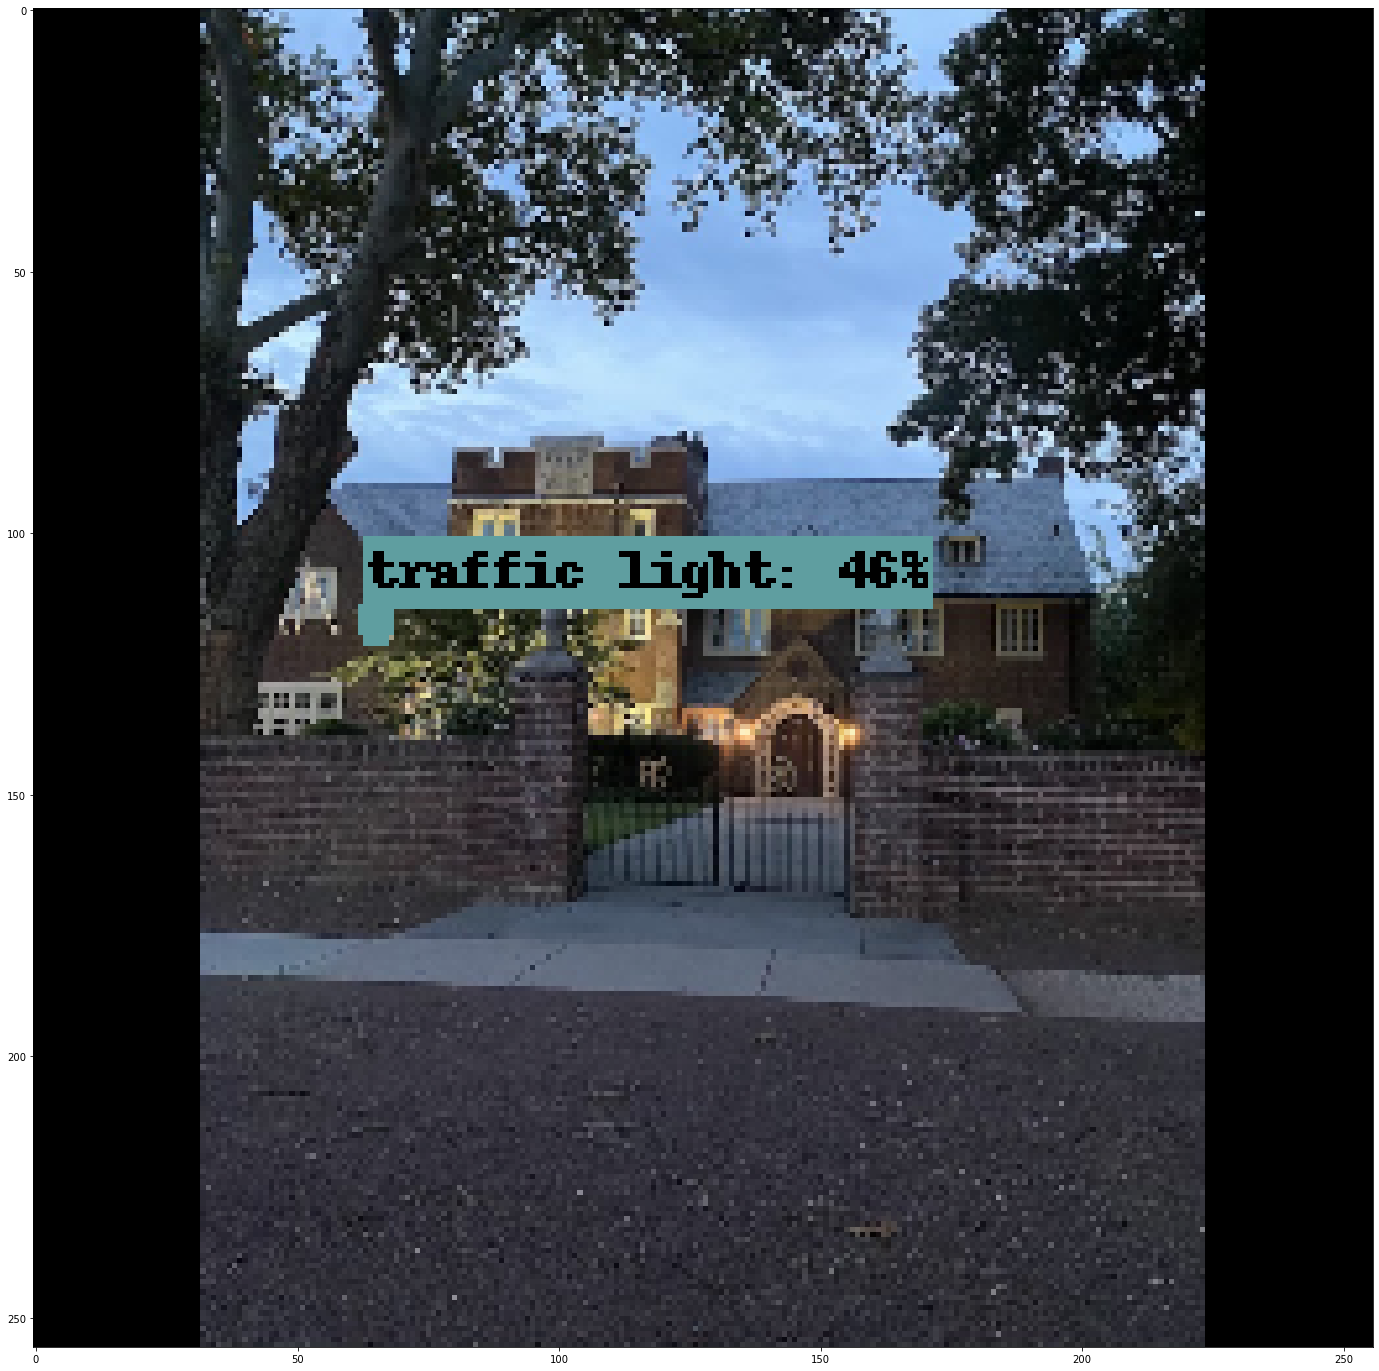

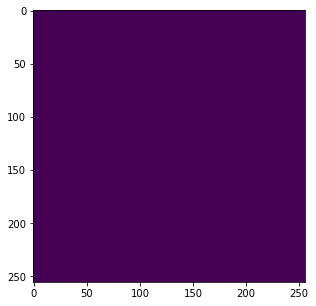

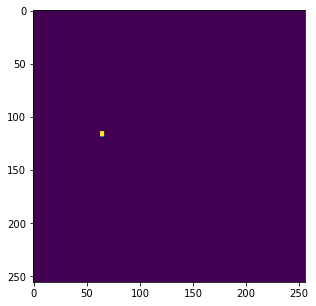

Inpainting...


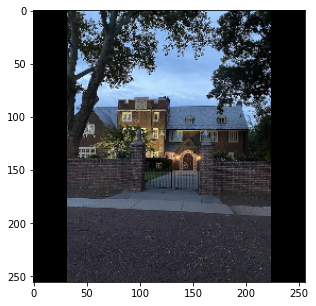

downloading traffic light from https://storage.googleapis.com/quickdraw_dataset/full/binary/traffic light.bin
download complete
loading traffic light drawings
load complete


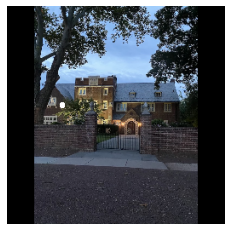

Evaluating :  IMG_2629.JPG


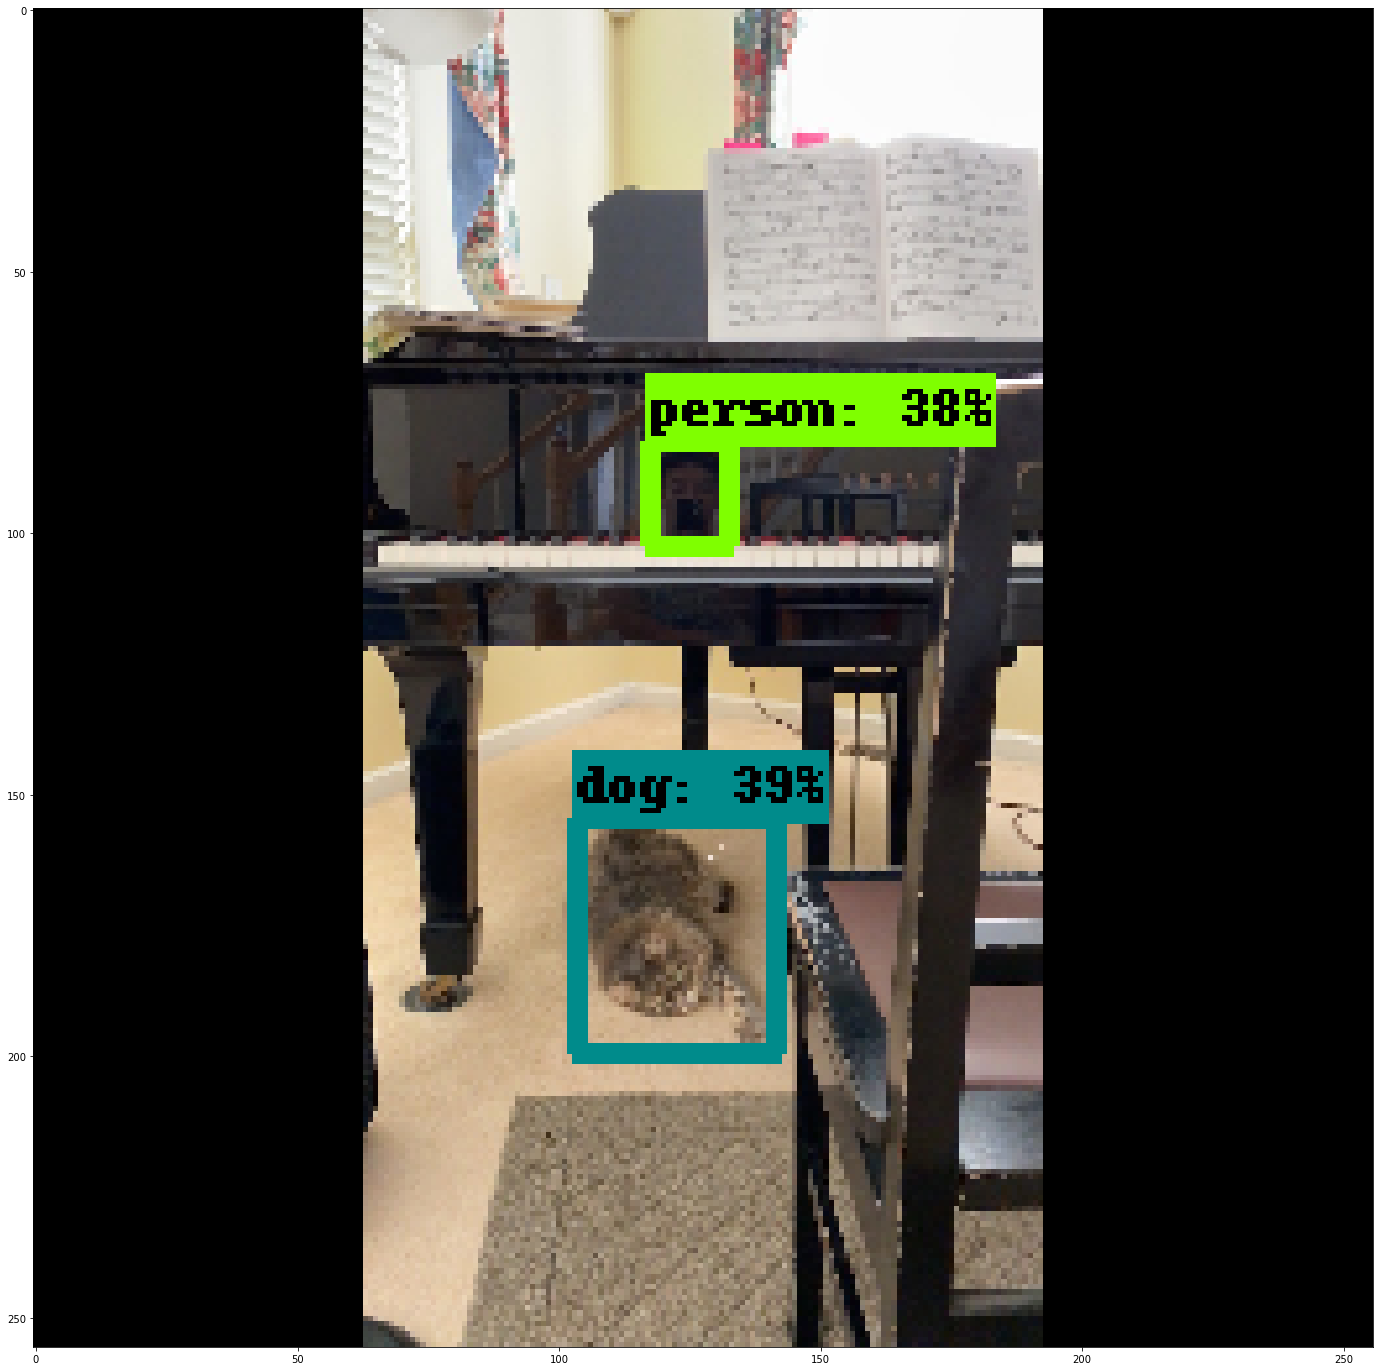

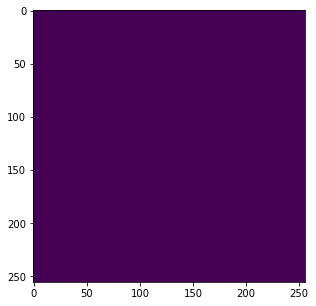

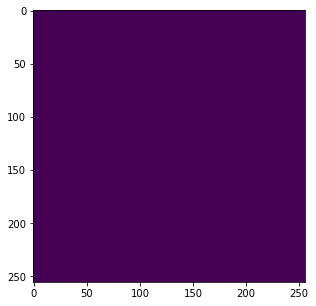

Inpainting...


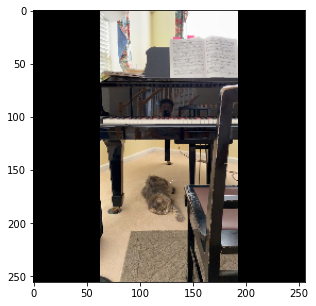

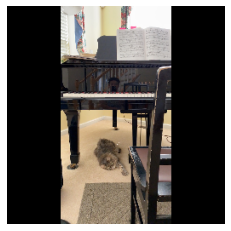

Evaluating :  IMG_2838.jpeg


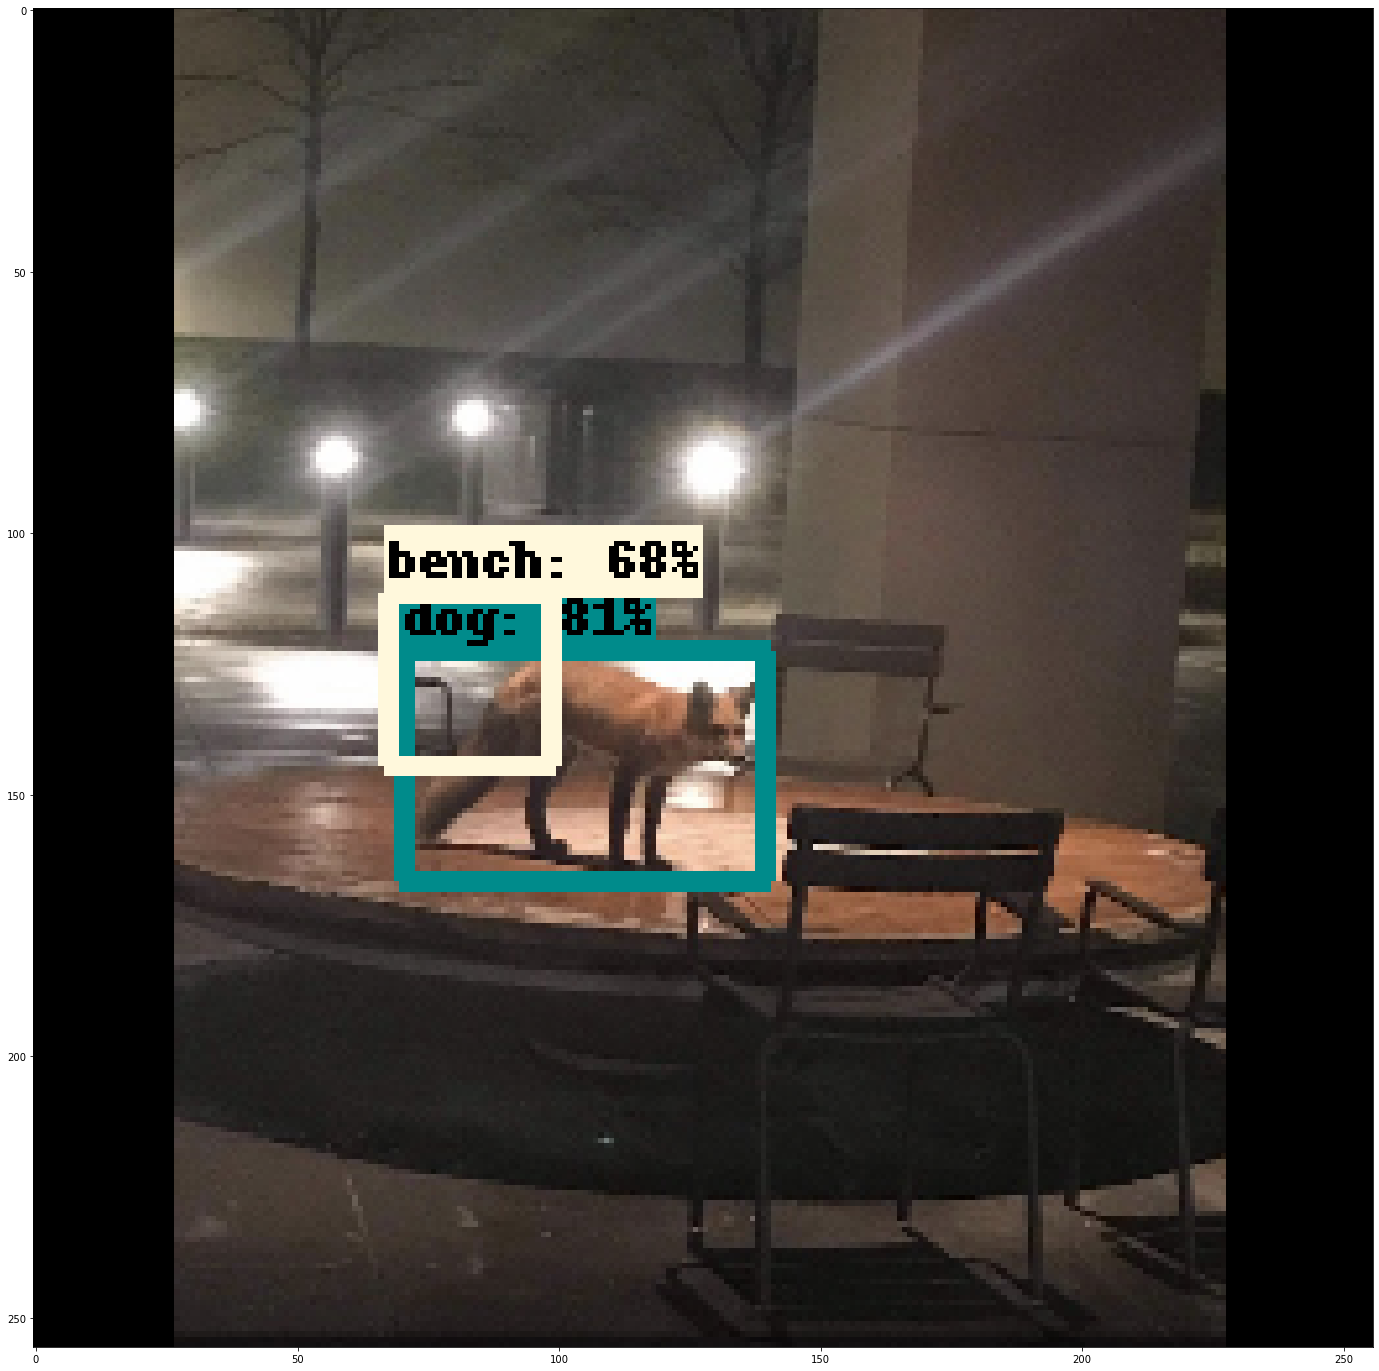

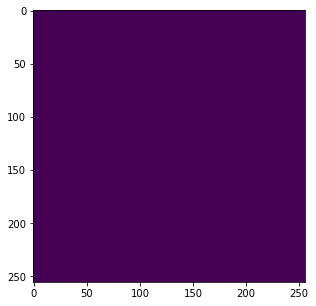

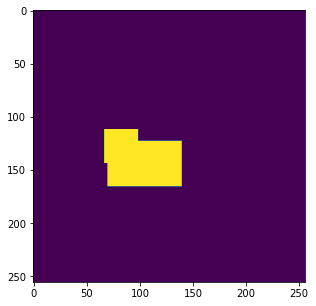

Inpainting...


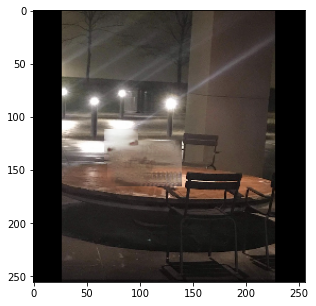

downloading dog from https://storage.googleapis.com/quickdraw_dataset/full/binary/dog.bin
download complete
loading dog drawings
load complete
downloading bench from https://storage.googleapis.com/quickdraw_dataset/full/binary/bench.bin
download complete
loading bench drawings
load complete


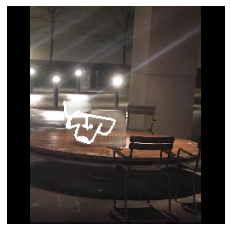

Evaluating :  IMG_0711.jpeg


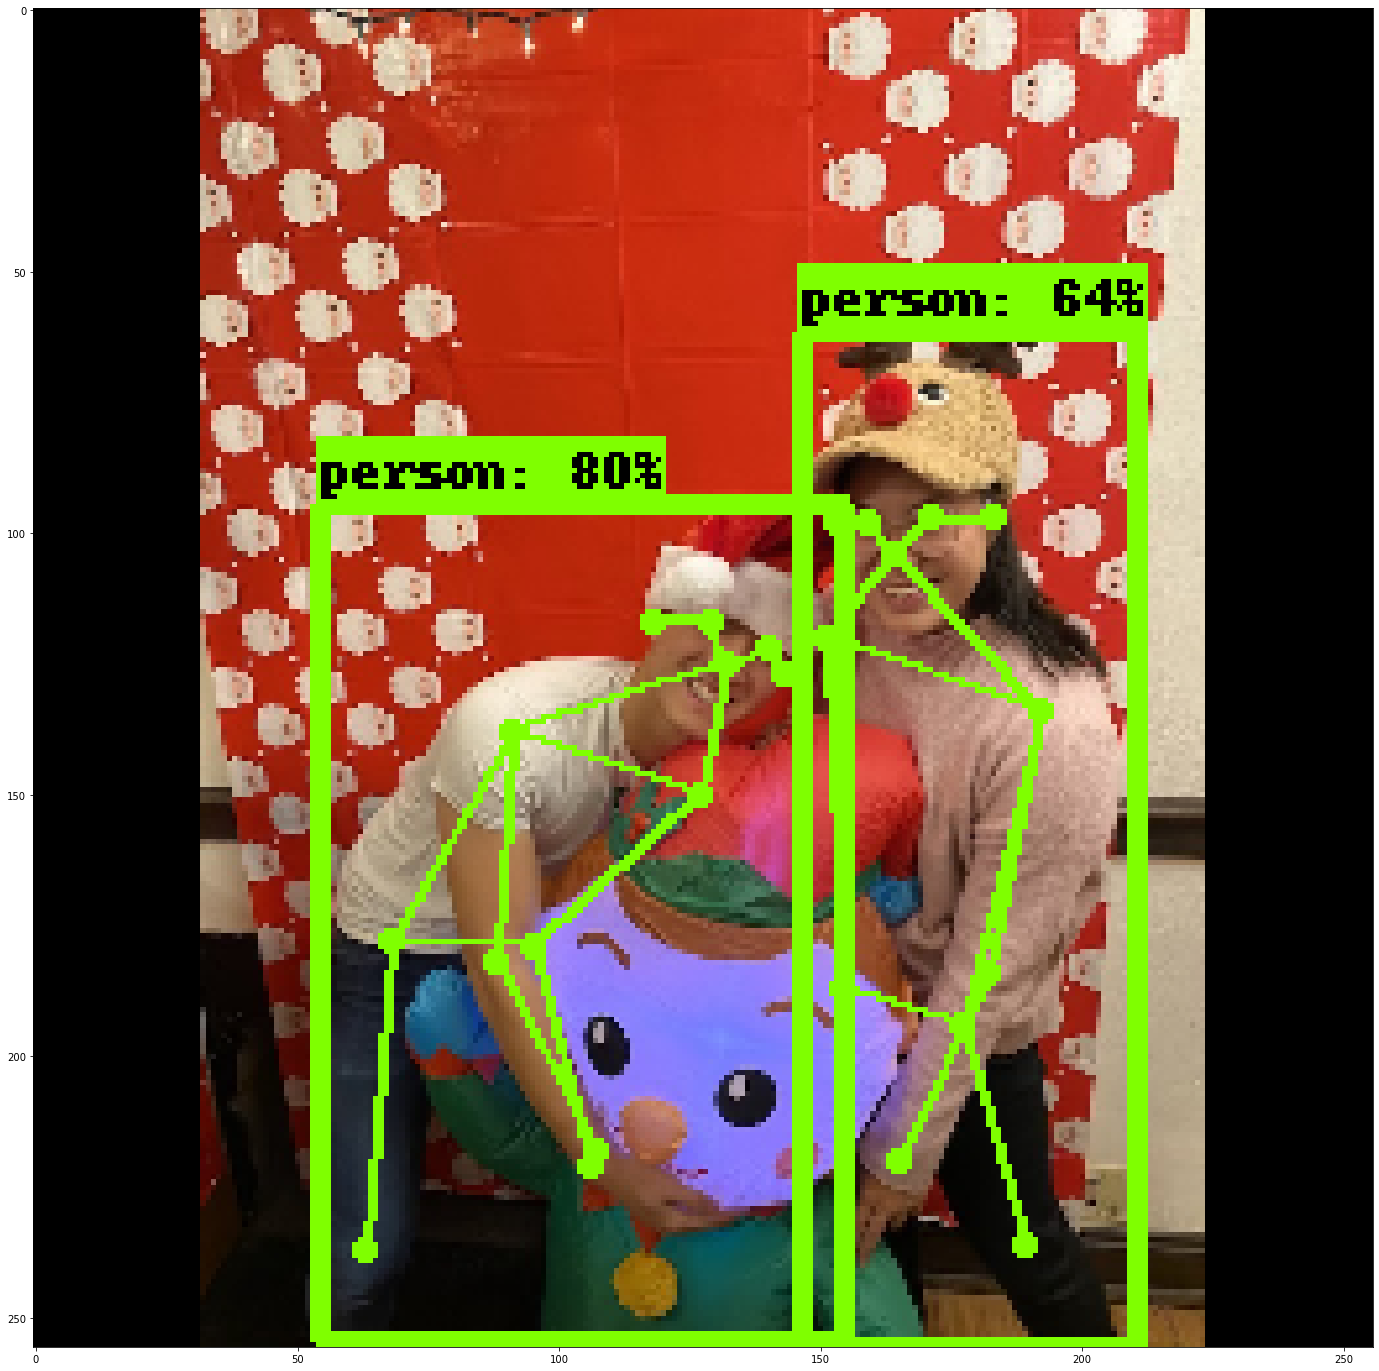

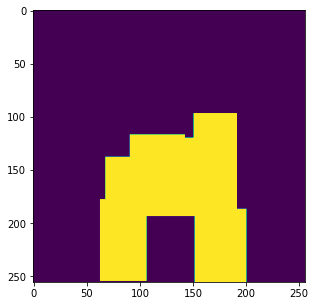

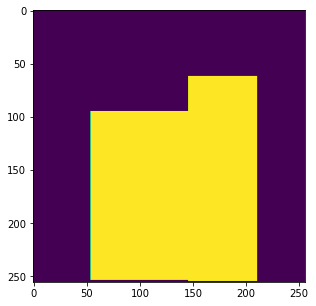

Inpainting...


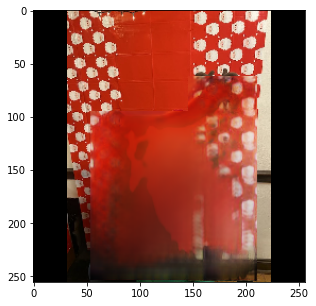

downloading face from https://storage.googleapis.com/quickdraw_dataset/full/binary/face.bin
download complete
loading face drawings
load complete
downloading t-shirt from https://storage.googleapis.com/quickdraw_dataset/full/binary/t-shirt.bin
download complete
loading t-shirt drawings
load complete
downloading pants from https://storage.googleapis.com/quickdraw_dataset/full/binary/pants.bin
download complete
loading pants drawings
load complete
loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete


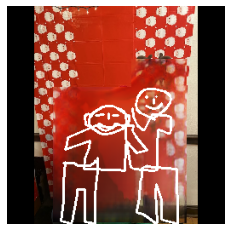

Evaluating :  000000548780.jpg


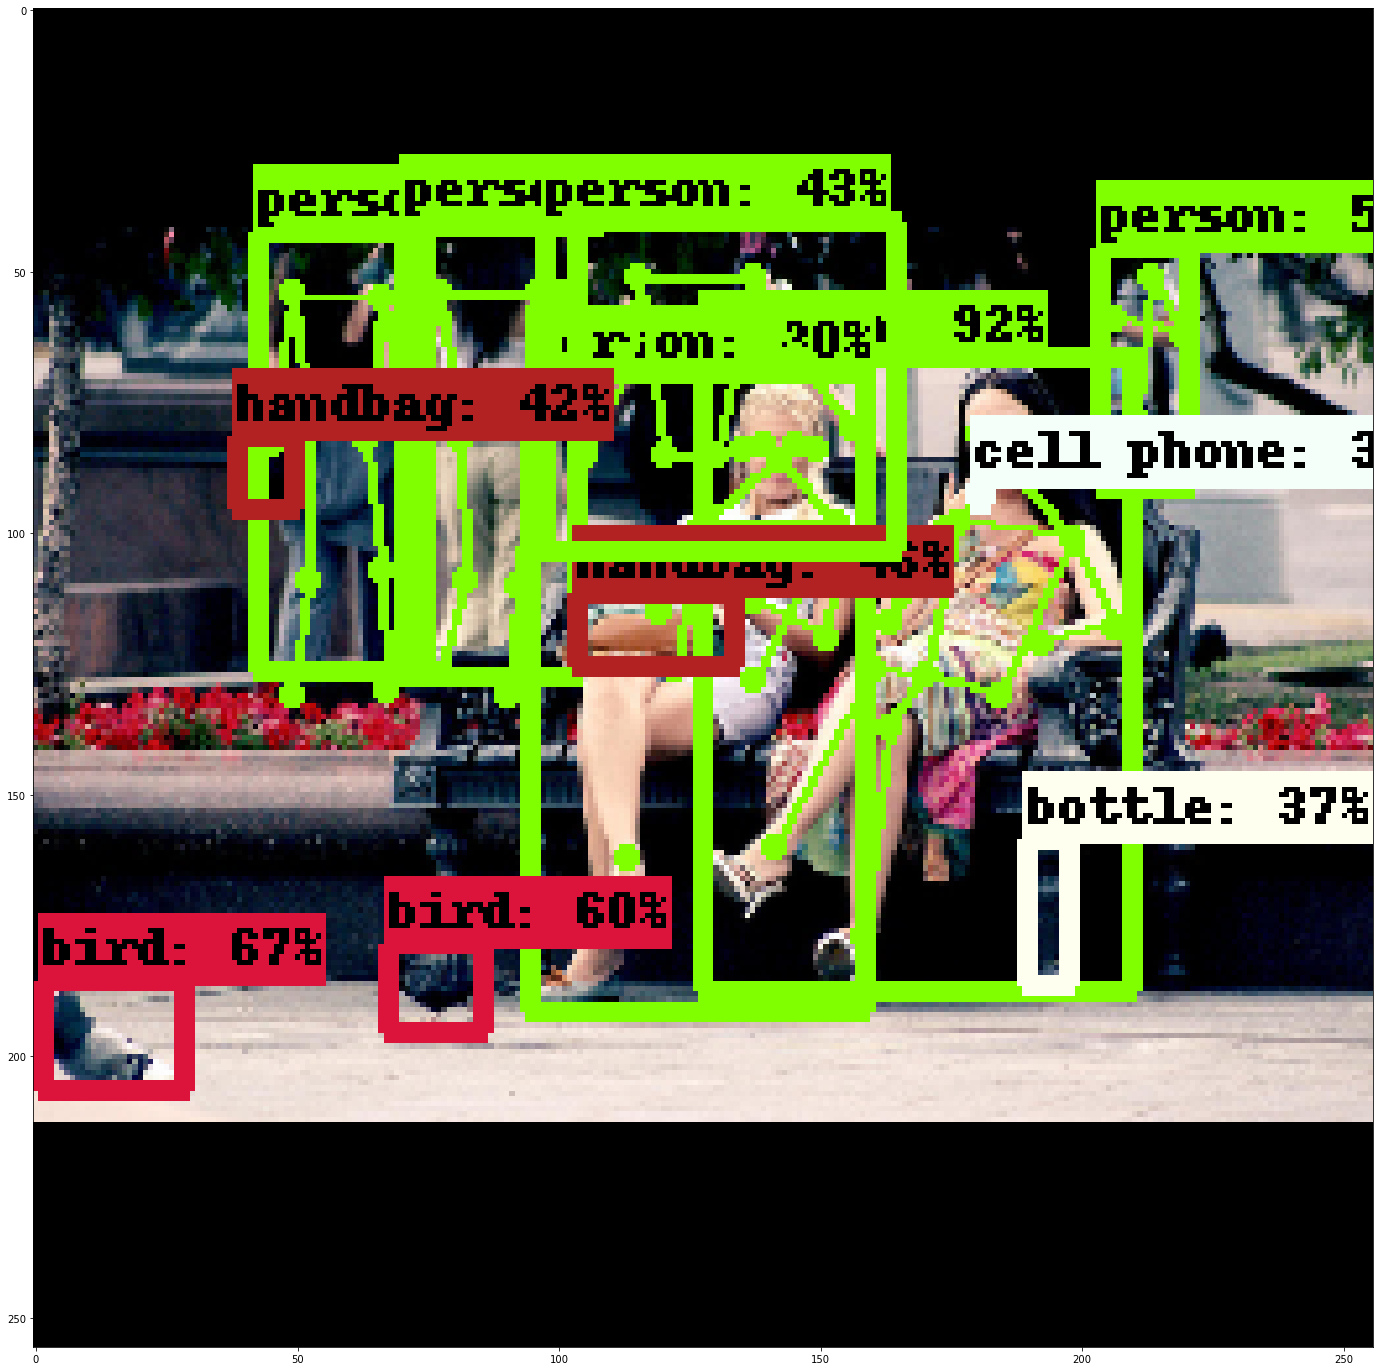

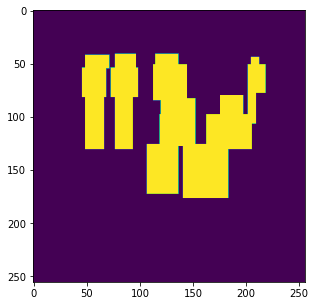

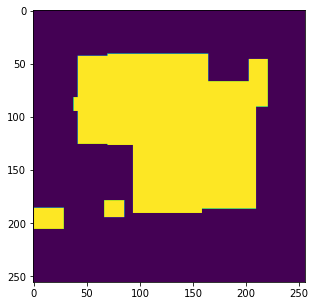

Inpainting...


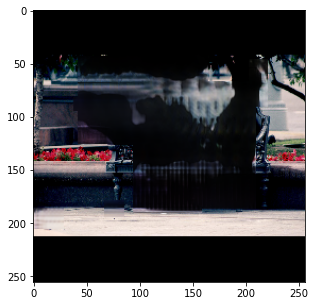

loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete
loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete
loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete
loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete
downloading bird from https://storage.googleapis.com/quickdraw_dataset/full/binary/bird.bin
download complete
loading bird drawings
load complete
loading bird drawings
load complete
loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete
downloading purse from https://storage.googleapis.com/quickdraw_dataset/full/binary/purse.bin
download complete
loading purse drawings
load complete
loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load comple

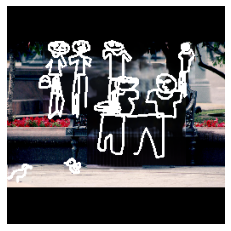

Evaluating :  IMG_0969.jpeg


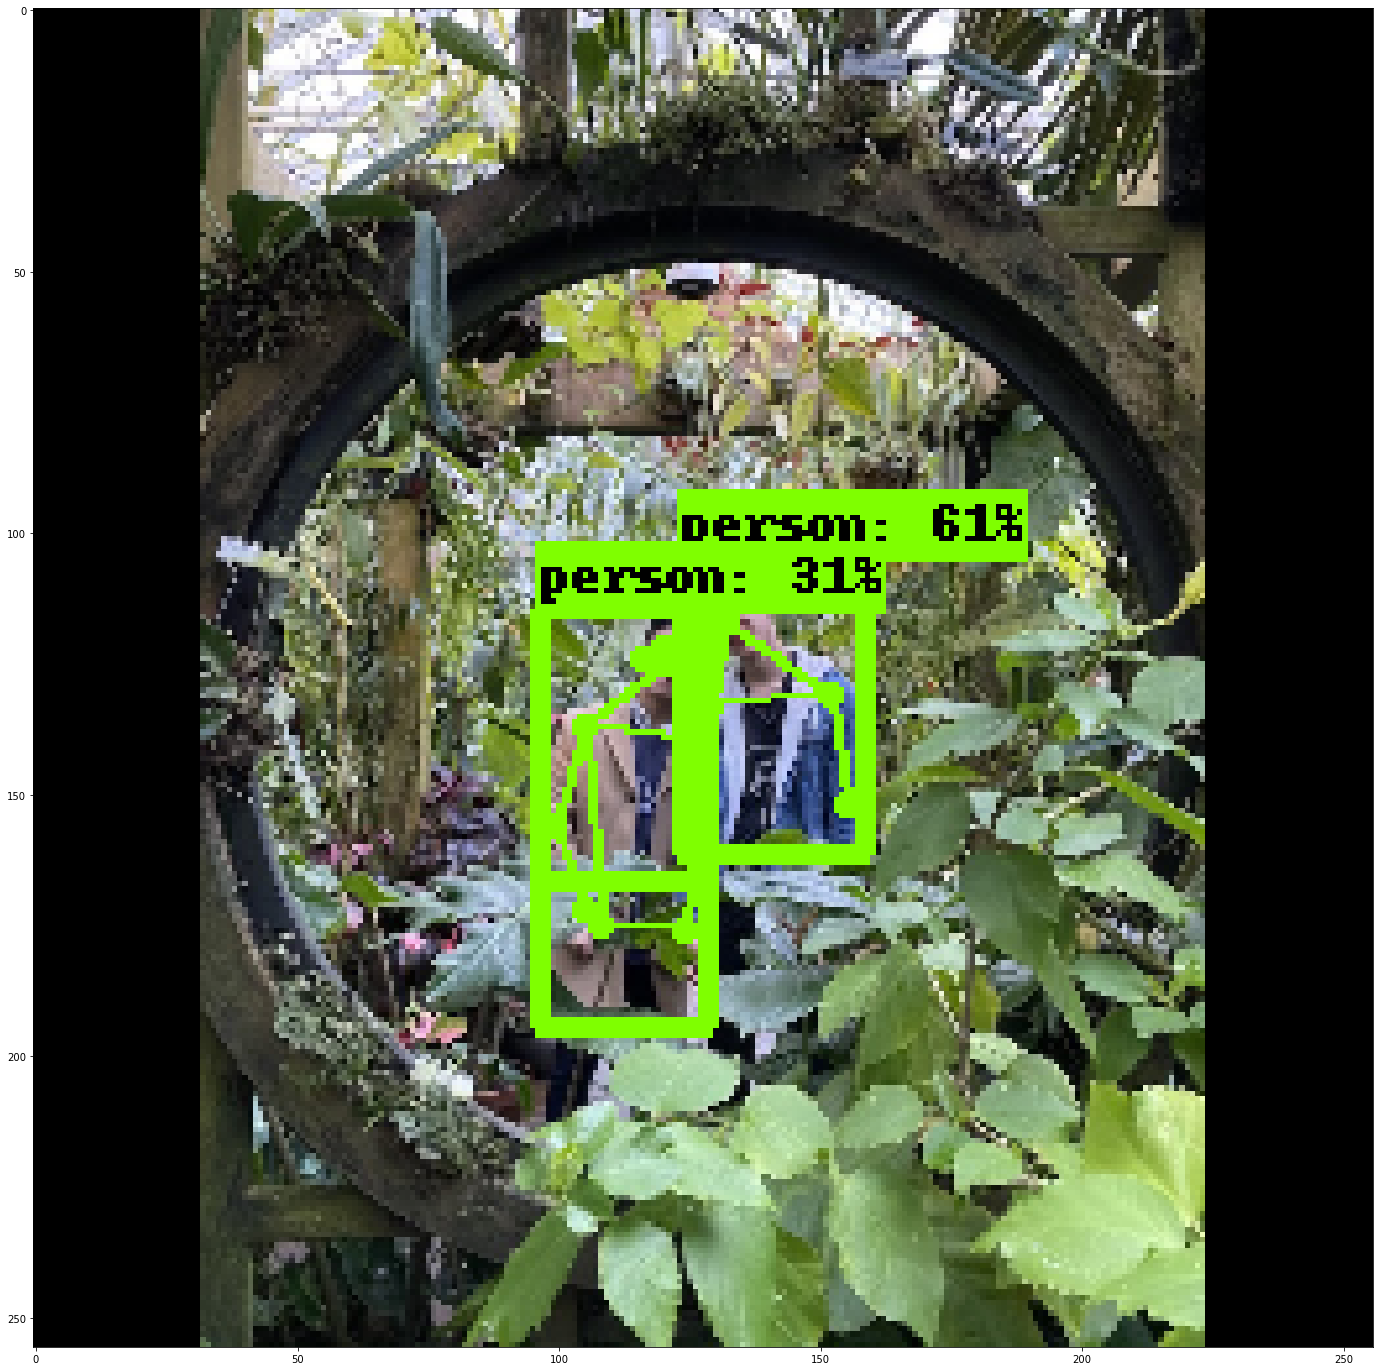

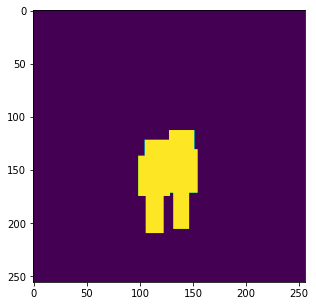

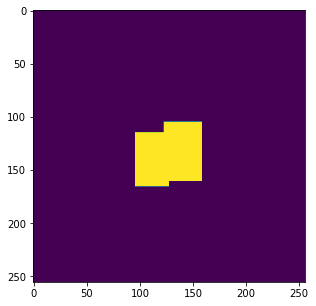

Inpainting...


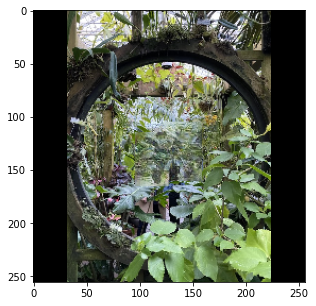

loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete
loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete


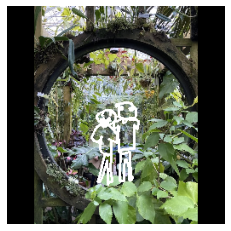

Evaluating :  IMG_1206.JPG


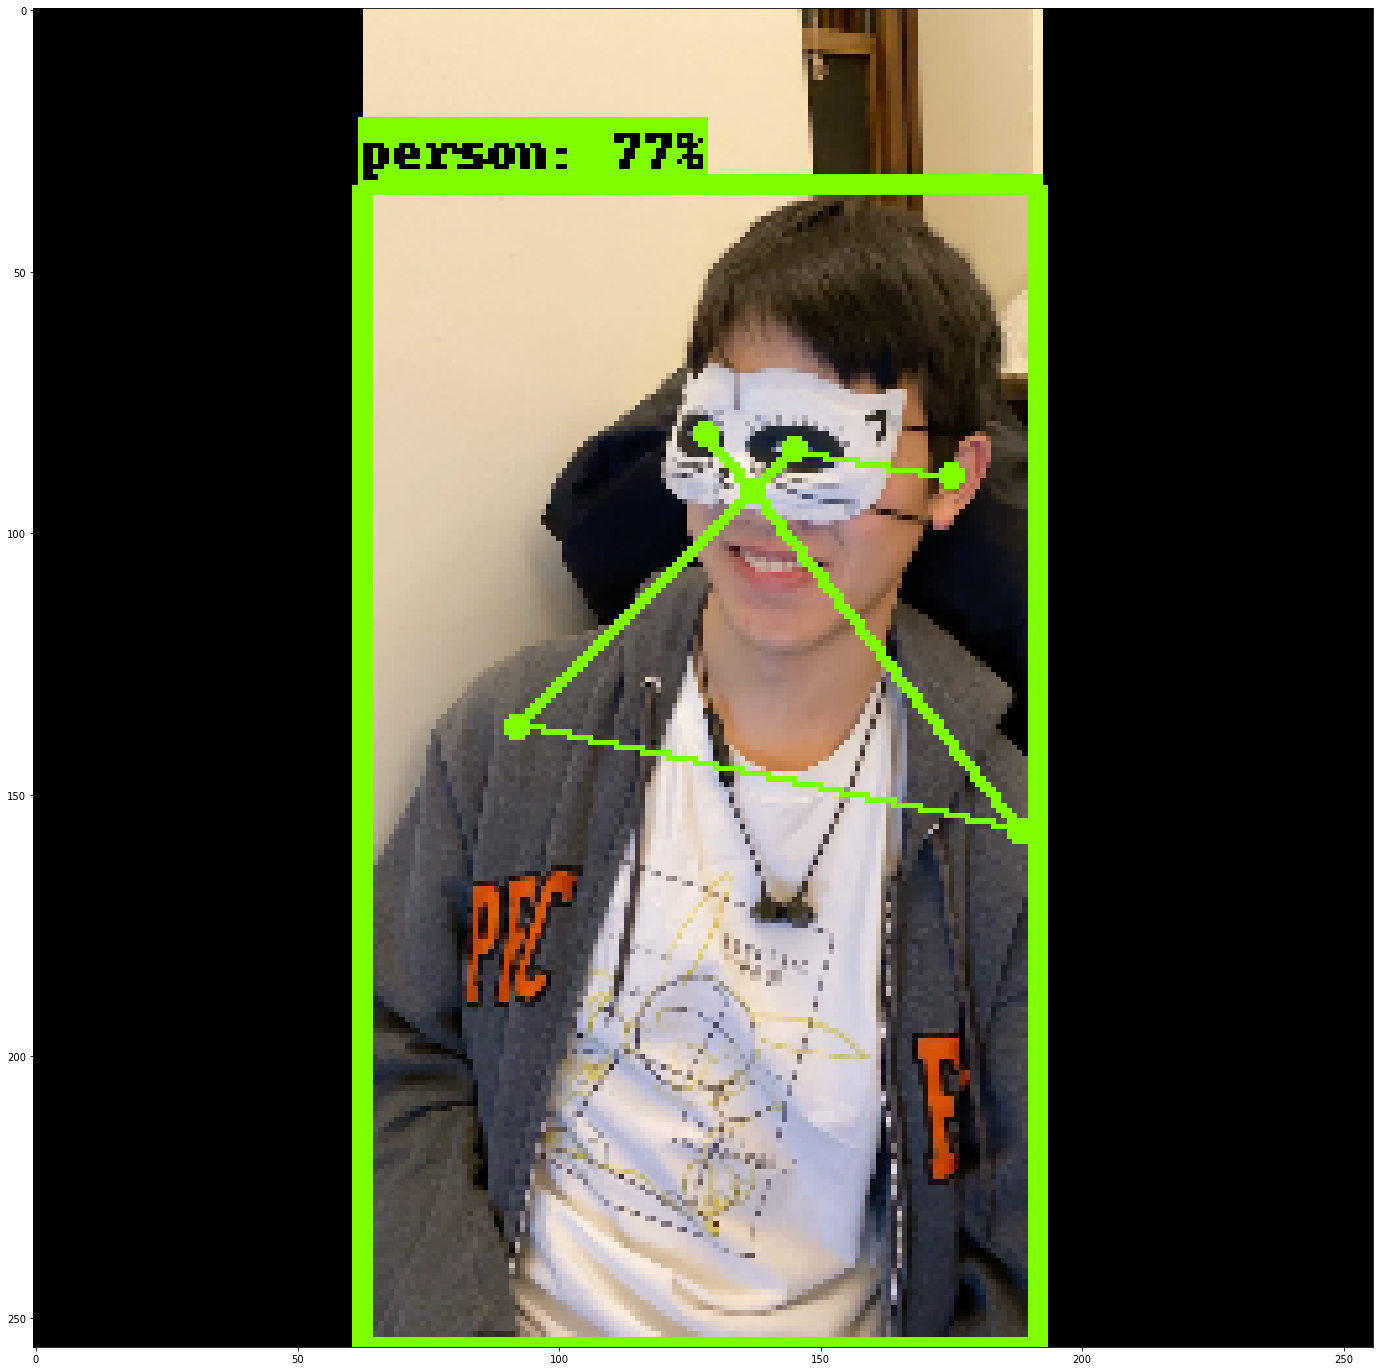

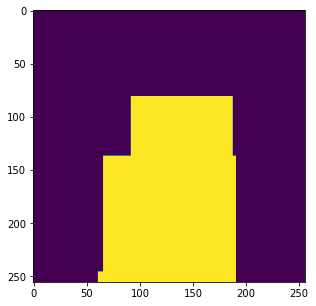

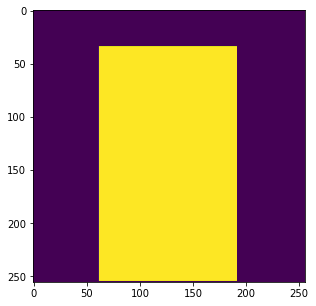

Inpainting...


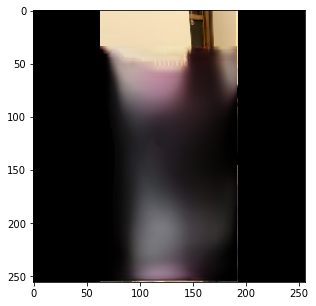

loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete


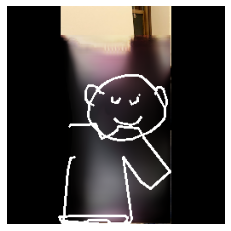

Evaluating :  000000281754.jpg


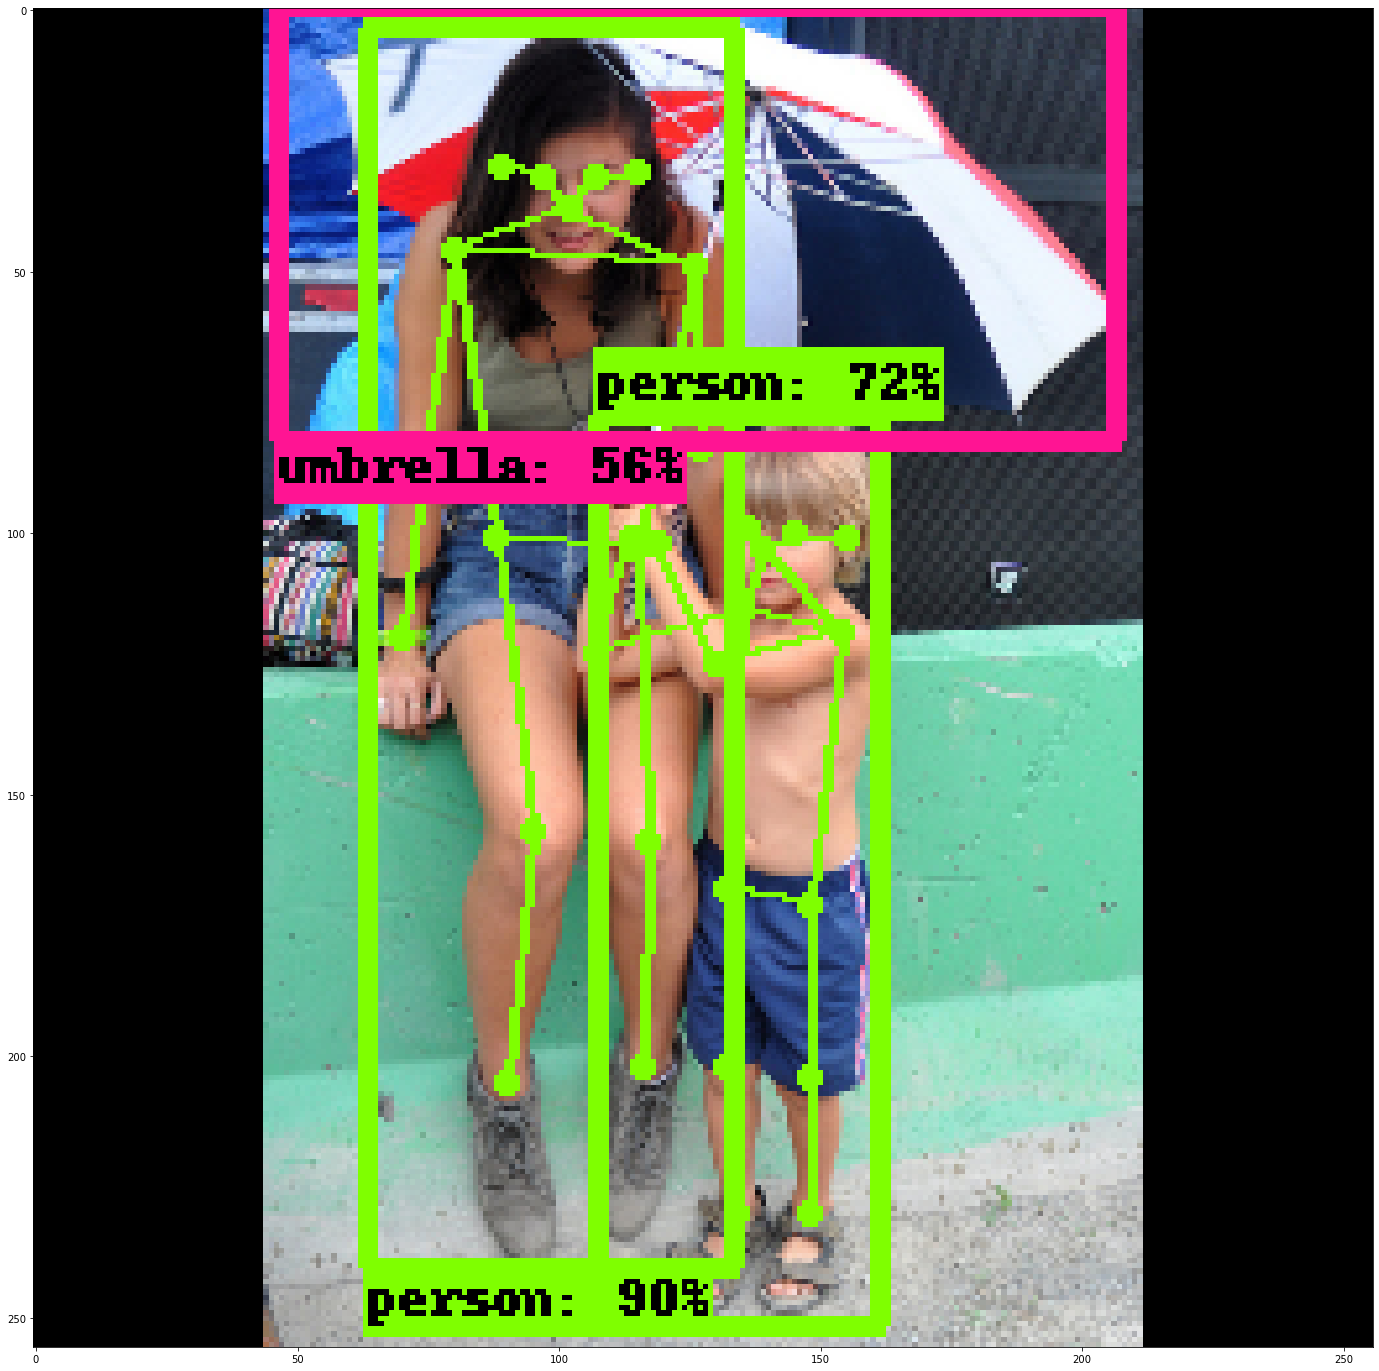

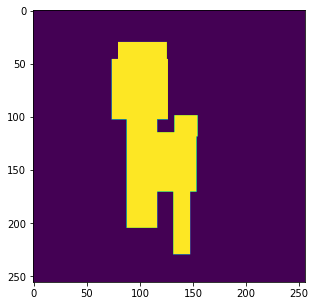

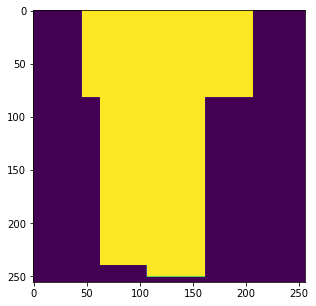

Inpainting...


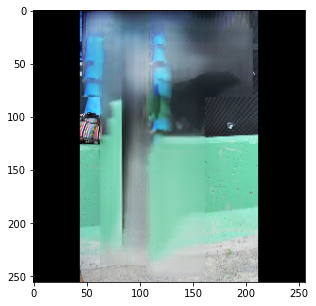

loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete
loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete
downloading umbrella from https://storage.googleapis.com/quickdraw_dataset/full/binary/umbrella.bin
download complete
loading umbrella drawings
load complete


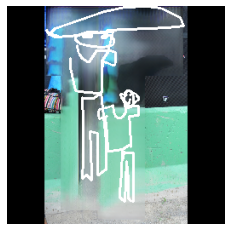

In [4]:
# Runs image evaluation on image in source_path and saves results to sink_path
def evaluate(object_detection, qd_dataset, inpainting, source_path, sink_path):
    for filename in os.listdir(source_path):
        if filename.endswith(".JPG") or filename.endswith(".PNG") or filename.endswith(".jpeg") or filename.endswith(".jpg"):
            print('Evaluating : ', filename)
            image_np = load_image_into_numpy_array(os.path.join(source_path, filename))
            image_resized = resize(image_np, 256)
            
            detections = object_detection.inference(image_resized, logging=True)
            pruned_detections, mask_detections, body_detections = qd_dataset.prune_detections(image_resized.shape, detections, threshold=0.4)
            
            _ = inpainting.create_mask(body_detections, logging=True)
            mask = inpainting.create_mask(mask_detections, logging=True)
            image_inpainted = inpainting.inpaint(image_resized, mask, logging=True)
        
            
            drawn_image = qd_dataset.draw(image_inpainted,image_resized, pruned_detections, os.path.join(sink_path, filename), logging=True)
#             qd_dataset.plot_histogram()
            
evaluate(object_detection, qd_dataset, inpainting, '../data/example_images', '../data/example_images_drawn')

Evaluate Single Image

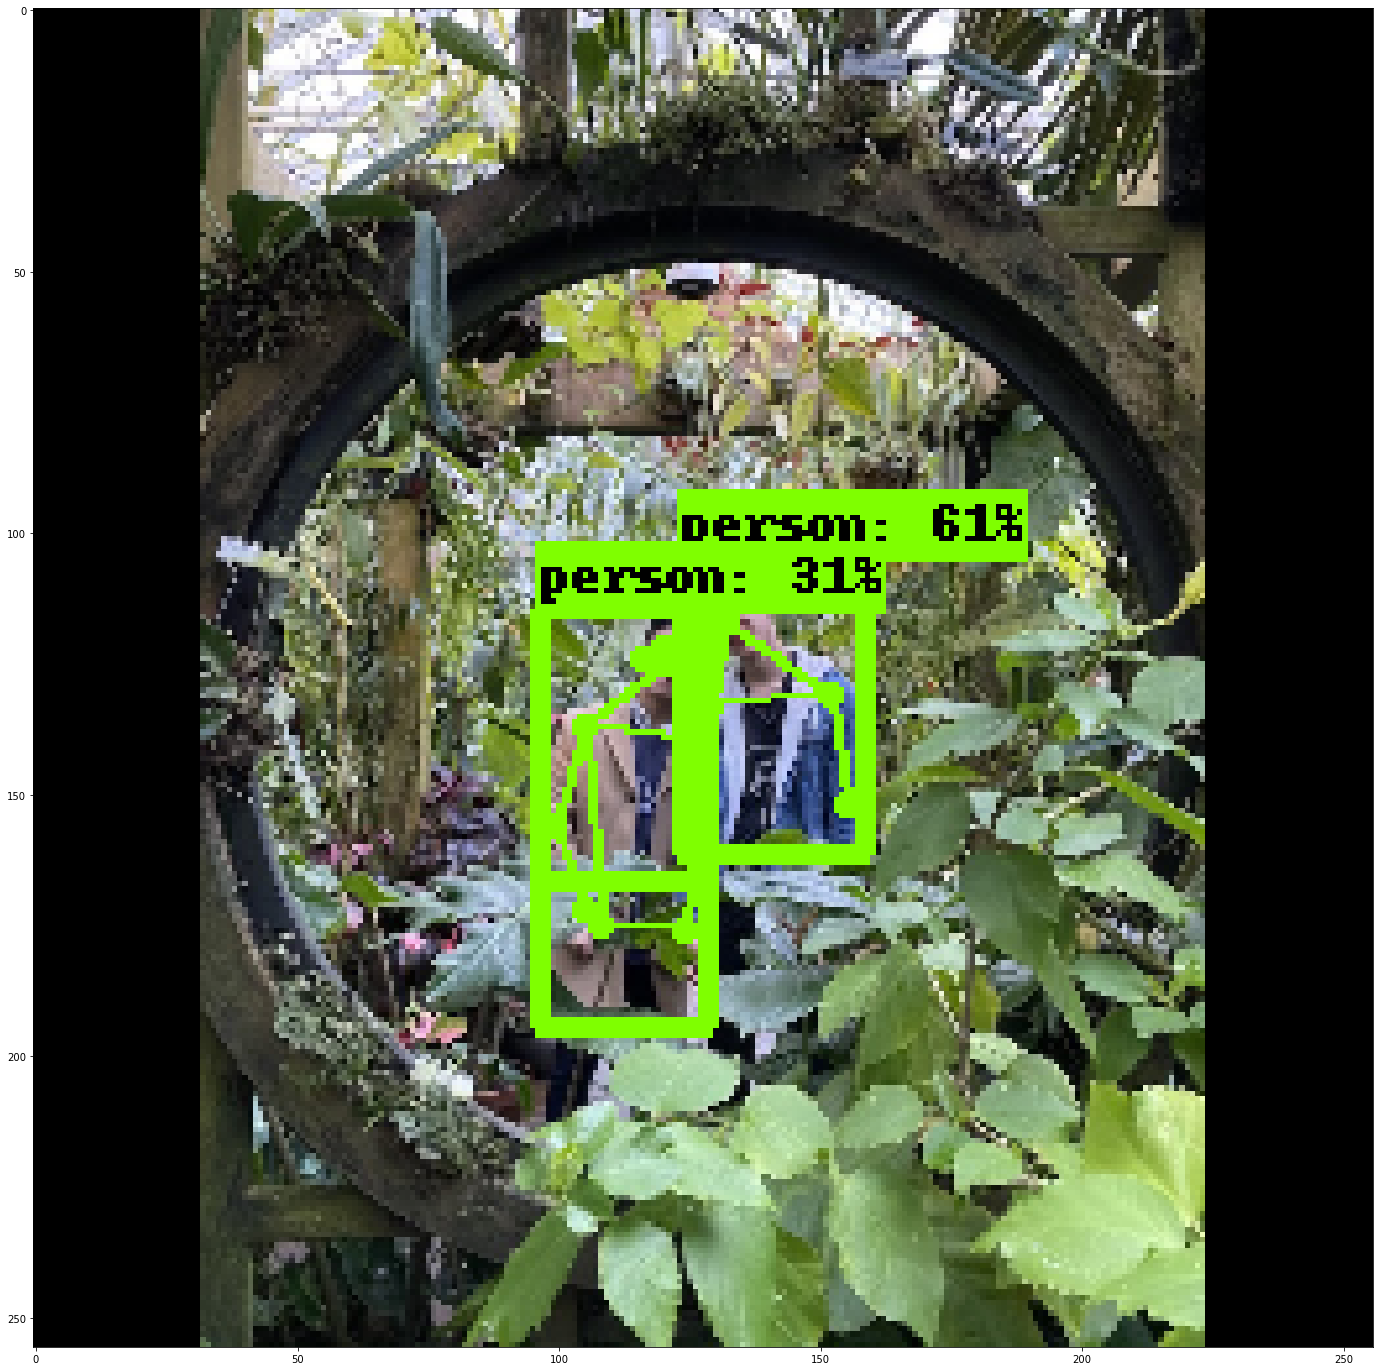

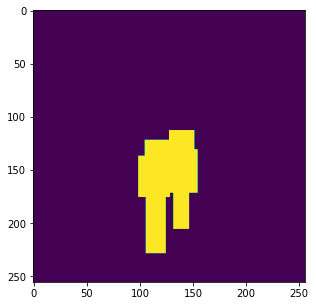

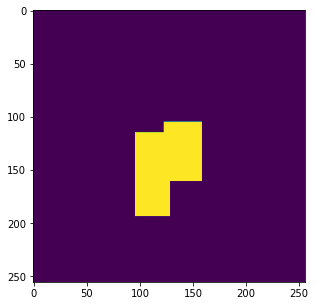

Inpainting...


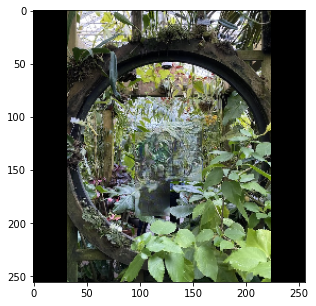

loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete
loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete
loading face drawings
load complete
loading t-shirt drawings
load complete
loading pants drawings
load complete


FileNotFoundError: [Errno 2] No such file or directory: '../data/example_images_drawn_dense/IMG_0969.jpeg'

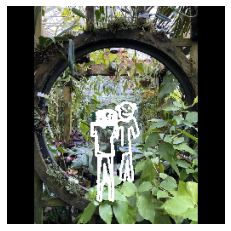

In [6]:

source_path = '../data/example_images'
sink_path = '../data/example_images_drawn_dense'
filename = 'IMG_0969.jpeg'

image_np = load_image_into_numpy_array(os.path.join(source_path, filename))
image_resized = resize(image_np, 256)
detections = object_detection.inference(image_resized, logging=True)
pruned_detections, mask_detections, body_detections = qd_dataset.prune_detections(image_resized.shape, detections, threshold=0.3)
_ = inpainting.create_mask(body_detections, logging=True)
mask = inpainting.create_mask(mask_detections, logging=True)
image_inpainted = inpainting.inpaint(image_resized, mask, logging=True)

drawn_image = qd_dataset.draw(image_inpainted,image_resized, pruned_detections, os.path.join(sink_path, filename), logging=True)
# qd_dataset.plot_histogram()